# NYC Taxi Data Analysis Project

## Introduction

This project analyzes a sample of NYC taxi ride data to uncover insights, trends, and patterns. The objectives include cleaning and preprocessing the data, engineering features, and conducting exploratory data analysis (EDA) to answer key questions about taxi usage in New York City.

### Objectives
- Identify peak hours for taxi rides.
- Understand fare dynamics based on distance and duration.
- Analyze tipping behavior.
- Explore patterns across different days of the week.

### Dataset Overview
The dataset used in this analysis is sourced from the NYC Taxi and Limousine Commission (TLC) and contains detailed records of taxi rides, including pickup and dropoff times, locations, fare amounts, and passenger counts.

## 1. Data Loading and Initial Exploration

We begin by loading the dataset and performing an initial inspection to understand its structure and contents.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/nyc_taxi_sample_data.csv')

# Initial inspection of the data
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

(   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
 0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
 1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
 2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
 3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
 4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
 
    trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
 0           2.50        -73.976746        40.765152           1   
 1           2.90        -73.983482        40.767925           1   
 2          19.98        -73.782021        40.644810           1   
 3          10.78        -73.863419        40.769814           1   
 4          30.43        -73.971741        40.792183           3   
 
   store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
 0                  N         -74.004265         40.7461

## 2. Data Cleaning and Preprocessing

In this step, we clean the data by handling missing values, duplicates, and incorrect data types. We also convert datetime fields and create unique identifiers for each trip.

In [12]:
# Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Create trip_id
df['trip_id'] = df.index

# Inspect the cleaned data
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

(   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
 0         1           2016-03-01   2016-03-01 00:07:55                1   
 1         1           2016-03-01   2016-03-01 00:11:06                1   
 2         2           2016-03-01   2016-03-01 00:31:06                2   
 3         2           2016-03-01   2016-03-01 00:00:00                3   
 4         2           2016-03-01   2016-03-01 00:00:00                5   
 
    trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
 0           2.50        -73.976746        40.765152           1   
 1           2.90        -73.983482        40.767925           1   
 2          19.98        -73.782021        40.644810           1   
 3          10.78        -73.863419        40.769814           1   
 4          30.43        -73.971741        40.792183           3   
 
   store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
 0                  N         -74.004265         40.7461

## 3. Feature Engineering

We extract additional features from the datetime columns and create dimension tables for further analysis.

In [13]:
# Extract datetime features
datetime_dim = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

# Inspect the datetime dimension table
datetime_dim.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,2016-03-01,2016-03-01 00:07:55,0,1,3,2016,1,0,1,3,2016,1
1,2016-03-01,2016-03-01 00:11:06,0,1,3,2016,1,0,1,3,2016,1
2,2016-03-01,2016-03-01 00:31:06,0,1,3,2016,1,0,1,3,2016,1
3,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1
4,2016-03-01,2016-03-01 00:00:00,0,1,3,2016,1,0,1,3,2016,1


## 4. Exploratory Data Analysis (EDA)

In this section, we analyze the distribution of various features and uncover trends and patterns.

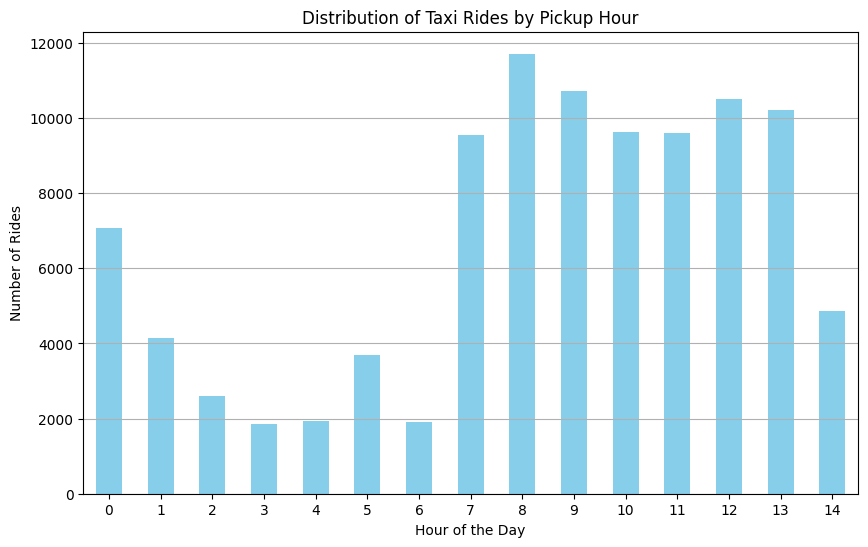

In [14]:
# Analyze peak hours for taxi rides
pickup_hour_distribution = datetime_dim['pick_hour'].value_counts().sort_index()

# Plotting the distribution of taxi rides by pickup hour
plt.figure(figsize=(10, 6))
pickup_hour_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Taxi Rides by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

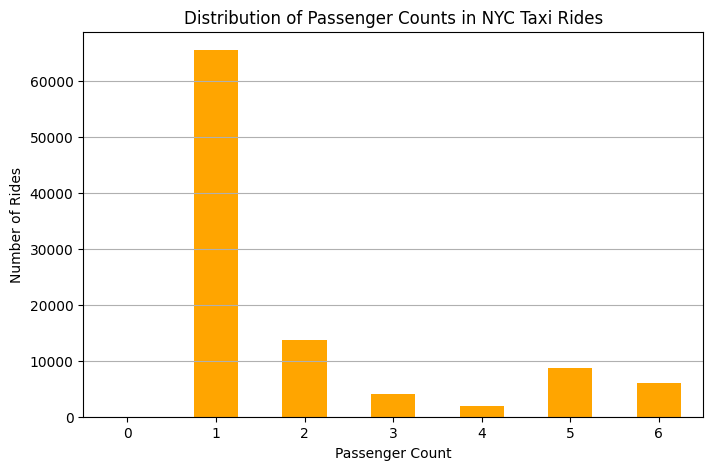

In [15]:
# Analyze passenger count distribution
passenger_count_distribution = df['passenger_count'].value_counts().sort_index()

# Plotting the distribution of passenger counts
plt.figure(figsize=(8, 5))
passenger_count_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Passenger Counts in NYC Taxi Rides')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

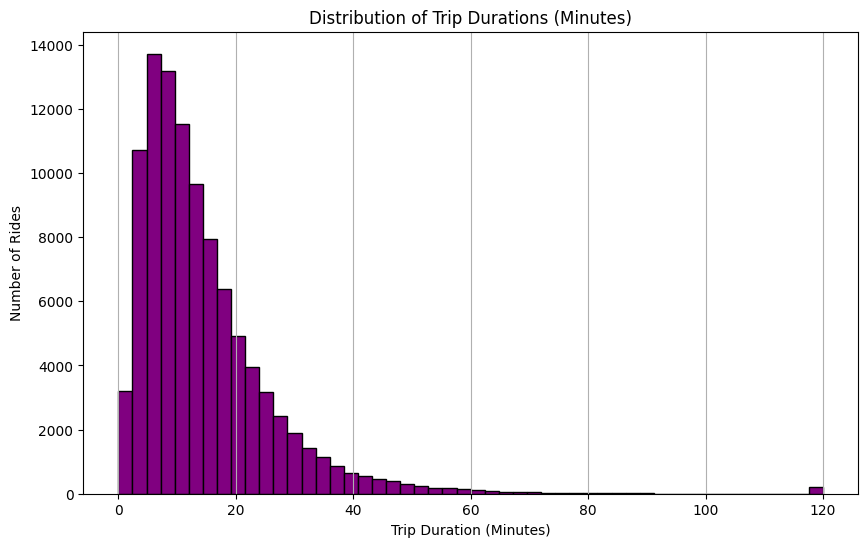

In [16]:
# Trip Duration Analysis
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0  # Convert to minutes
trip_duration_distribution = df['trip_duration'].clip(upper=120)  # Clipping to 120 minutes for better visualization

plt.figure(figsize=(10, 6))
trip_duration_distribution.hist(bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Trip Durations (Minutes)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

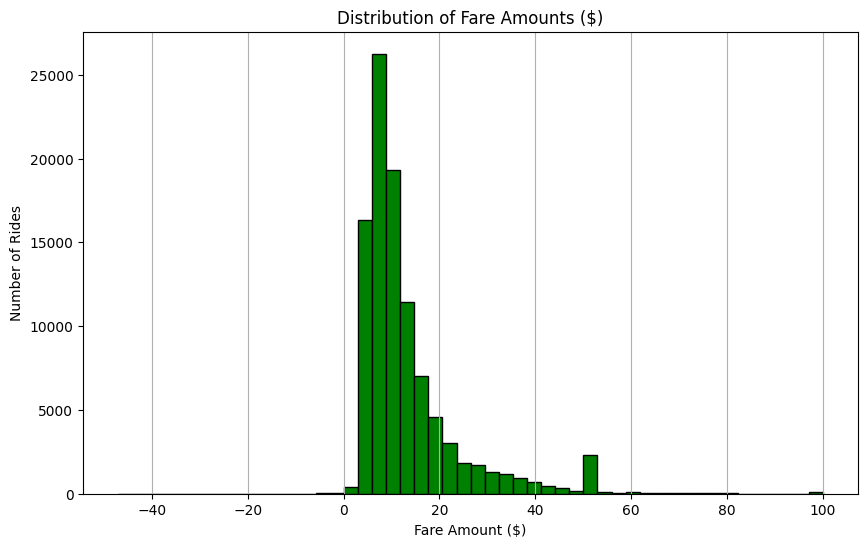

In [17]:
# Fare Amount Analysis
fare_amount_distribution = df['fare_amount'].clip(upper=100)  # Clipping to $100 for better visualization

plt.figure(figsize=(10, 6))
fare_amount_distribution.hist(bins=50, color='green', edgecolor='black')
plt.title('Distribution of Fare Amounts ($)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

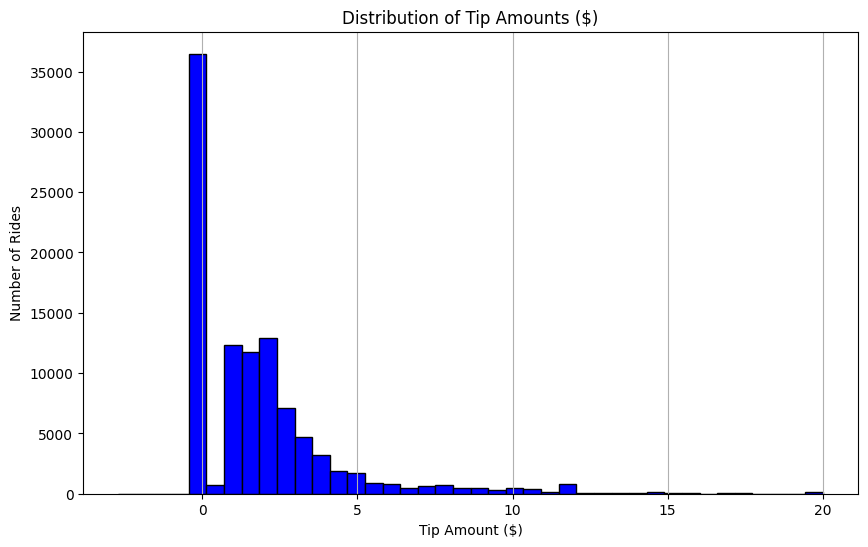

In [18]:
# Tip Amount Analysis
tip_amount_distribution = df['tip_amount'].clip(upper=20)  # Clipping to $20 for better visualization

plt.figure(figsize=(10, 6))
tip_amount_distribution.hist(bins=40, color='blue', edgecolor='black')
plt.title('Distribution of Tip Amounts ($)')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()

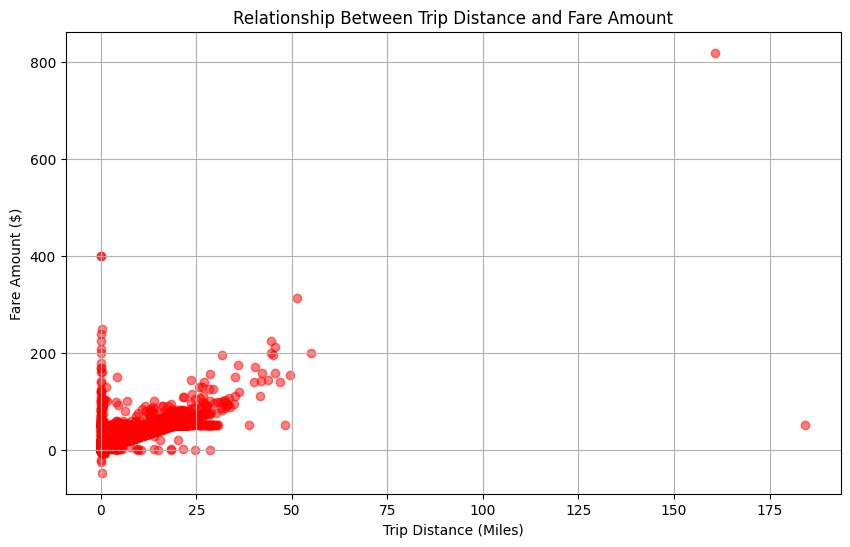

In [19]:
# Distance Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.5, color='red')
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

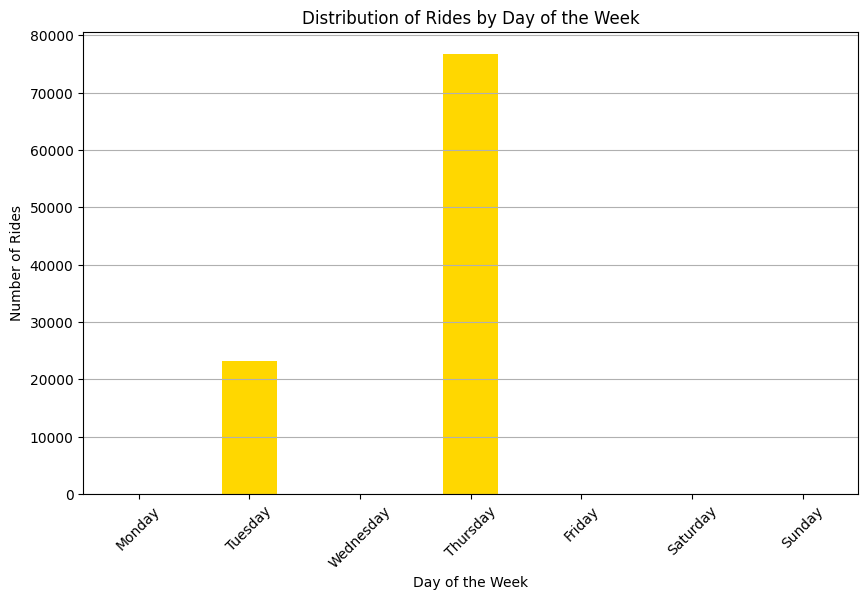

In [20]:
# Day of the Week Analysis
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
day_of_week_distribution = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_of_week_distribution.plot(kind='bar', color='gold')
plt.title('Distribution of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 5. Conclusions and Insights

In this project, we explored the NYC taxi dataset to uncover various insights:

- Most taxi rides occur during rush hours, with a higher frequency during weekdays.
- The majority of rides are short, both in terms of distance and duration.
- Fare amounts are generally low, with some outliers for longer trips.
- Tipping behavior is consistent, with most tips being under $5.
- There is a clear relationship between trip distance and fare amount, as expected.